In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential # It is build to build ann. Anything which is capital is a class
from tensorflow.keras.layers import Dense,Dropout # it is used to add hidden layers
from sklearn.metrics import classification_report #evaluation

In [ ]:
df=pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop(['id'],inplace=True,axis=1)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
x=df.iloc[:,1:]
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y=df['diagnosis']
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
xtrain

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.13890,0.15820,0.180400,0.09608,0.2664,0.07809
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.251200,0.13390,0.2534,0.07858
529,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,...,13.45,15.77,86.92,549.9,0.15210,0.16320,0.162200,0.07393,0.2781,0.08052
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.044970,0.1886,0.06320,...,12.64,19.67,81.93,475.7,0.14150,0.21700,0.230200,0.11050,0.2787,0.07427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,...,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.567300,0.17320,0.3305,0.08465
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,...,11.95,20.72,77.79,441.2,0.10760,0.12230,0.097550,0.03413,0.2300,0.06769
72,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,...,23.32,33.82,151.60,1681.0,0.15850,0.73940,0.656600,0.18990,0.3313,0.13390
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,15.33,30.28,98.27,715.5,0.12870,0.15130,0.062310,0.07963,0.2226,0.07617


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#easrly_stop = EarlyStopping(monitor='val_loss','mode='min',verbose=1,patiemce=10)

In [ ]:
# init model
ann=Sequential()

#step2: add layers into model
ann.add(Dense(units=20,activation='relu'))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=20,activation='relu'))
ann.add(Dropout(rate=0.2)) # created one hidden layer
ann.add(Dense(units=1,activation='sigmoid')) # output layer

# step3 establish connection b/w layers
ann.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#ann.fit(xtrain,ytain,batch_size=120,epochs=600,verbose=2,validation_data=(xtest,ytest),callbacks=[early_stop])

#step4 train the model
ann.fit(xtrain,ytrain,batch_size=120,epochs=600,verbose=2)



Epoch 1/600
4/4 - 1s - loss: 0.7768 - accuracy: 0.4196 - 655ms/epoch - 164ms/step
Epoch 2/600
4/4 - 0s - loss: 0.7562 - accuracy: 0.4497 - 12ms/epoch - 3ms/step
Epoch 3/600
4/4 - 0s - loss: 0.7282 - accuracy: 0.4523 - 12ms/epoch - 3ms/step
Epoch 4/600
4/4 - 0s - loss: 0.6856 - accuracy: 0.5327 - 16ms/epoch - 4ms/step
Epoch 5/600
4/4 - 0s - loss: 0.6569 - accuracy: 0.5879 - 14ms/epoch - 4ms/step
Epoch 6/600
4/4 - 0s - loss: 0.6526 - accuracy: 0.5704 - 14ms/epoch - 3ms/step
Epoch 7/600
4/4 - 0s - loss: 0.6136 - accuracy: 0.6533 - 19ms/epoch - 5ms/step
Epoch 8/600
4/4 - 0s - loss: 0.6140 - accuracy: 0.6658 - 13ms/epoch - 3ms/step
Epoch 9/600
4/4 - 0s - loss: 0.5763 - accuracy: 0.7211 - 11ms/epoch - 3ms/step
Epoch 10/600
4/4 - 0s - loss: 0.5575 - accuracy: 0.7613 - 12ms/epoch - 3ms/step
Epoch 11/600
4/4 - 0s - loss: 0.5678 - accuracy: 0.7412 - 17ms/epoch - 4ms/step
Epoch 12/600
4/4 - 0s - loss: 0.5410 - accuracy: 0.7563 - 13ms/epoch - 3ms/step
Epoch 13/600
4/4 - 0s - loss: 0.5292 - accurac

In [ ]:
ann.history.history

{'loss': [0.7767722606658936,
  0.7561717629432678,
  0.7282265424728394,
  0.6856078505516052,
  0.656899631023407,
  0.652551531791687,
  0.6136336922645569,
  0.6139611601829529,
  0.5763497352600098,
  0.5575123429298401,
  0.5677856802940369,
  0.5409747362136841,
  0.5291683673858643,
  0.5178707242012024,
  0.4984126389026642,
  0.49141839146614075,
  0.48173242807388306,
  0.4752025902271271,
  0.4766245186328888,
  0.4439266622066498,
  0.4431637227535248,
  0.4385702311992645,
  0.4141274392604828,
  0.4097510874271393,
  0.4092386066913605,
  0.39657124876976013,
  0.4113008975982666,
  0.39733314514160156,
  0.38465484976768494,
  0.3895016312599182,
  0.361942321062088,
  0.38158953189849854,
  0.35965731739997864,
  0.34045860171318054,
  0.3343298137187958,
  0.34172043204307556,
  0.32226303219795227,
  0.3288571238517761,
  0.3138839602470398,
  0.300182044506073,
  0.30250993371009827,
  0.29724085330963135,
  0.3000681400299072,
  0.2941490411758423,
  0.303930193185

<Axes: >

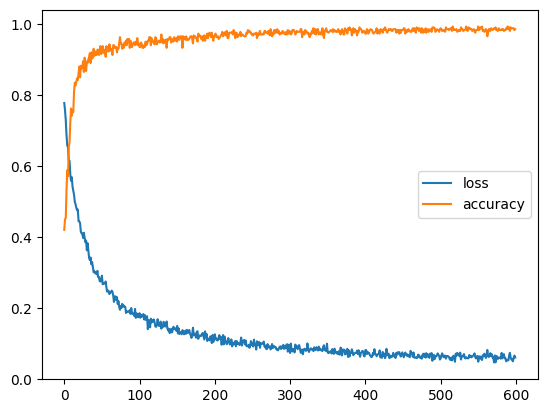

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred=ypred>0.5

In [ ]:
ypred=np.where(ypred<0.5,0,1)
ypred

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

